# 보스턴 부동산 가격을 Linear Regression으로 예측해보기

## Linear Regression 모델
![image.png](https://upload.wikimedia.org/wikipedia/commons/b/be/Normdist_regression.png)

## 예제1 - 키(Height)로 몸무게(Weight) 예측해보기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


#plt.rcParams['font.family'] = 'Malgun Gothic' # 윈도우(Windwos) 사용자
plt.rcParams['font.family'] = 'AppleGothic' # 맥(Mac) 사용자
plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

In [3]:
url = "https://raw.githubusercontent.com/solaris33/data-science-for-all/main/lecture_4/weight-height.csv"
weight_height_df = pd.read_csv(url)

In [4]:
weight_height_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
weight_height_df.shape

(10000, 3)

In [6]:
weight_height_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [7]:
weight_height_df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


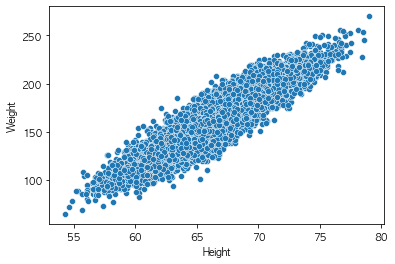

In [8]:
X = weight_height_df["Height"]
y = weight_height_df["Weight"]
sns.scatterplot(x = X, y = y)
plt.show()

In [9]:
# 80%는 트레이닝 데이터, 20%는 테스트 데이터로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
X_train.values.reshape(-1,1)

array([[68.14476095],
       [71.05995586],
       [67.96596781],
       ...,
       [68.74364712],
       [65.92942171],
       [57.65488503]])

In [17]:
y_train

2216    181.265825
2646    189.324671
742     176.966728
9207    130.568403
5792    135.193972
           ...    
1953    183.727096
6150    144.555484
3185    189.780275
252     168.090412
5716     98.876723
Name: Weight, Length: 8000, dtype: float64

In [23]:
# 선형회귀(Linear Regression) 모델 선언하기
lr = LinearRegression()

# 선형회귀(Linear Regression) 모델 학습하기
# reshape 부분을 유의!, 몸무게 값만 들어가야되기 때문에 ₩
lr.fit(X_train.values.reshape(-1,1), y_train)


# 테스트 데이터에 대한 예측을 수행합니다.
y_pred = lr.predict(X_test.values.reshape(-1,1))

In [24]:
# MSE(Mean Squared Error)를 측정합니다.
# 예측값과 실제값의 차이
MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error)를 측정합니다.
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

MSE : 141.8926513966225
RMSE : 11.91187018887557


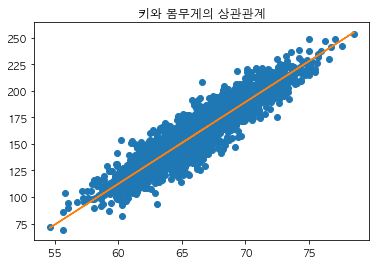

In [13]:
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, y_pred)
plt.title('키와 몸무게의 상관관계')
plt.show()

## 예제2 - 보스턴 부동산 가격을 Linear Regression으로 예측해보자

### 보스턴 부동산 데이터의 특징들(Features)
1. CRIM: 도시별 범죄발생률
2. ZN: 25,000평을 넘는 토지의 비율
3. INDUS: 도시별 비상업 지구의 비유
4. CHAS: 찰스 강의 더미 변수(1 = 강의 경계, 0 = 나머지)
5. NOX: 일산화질소 농도
6. RM: 주거할 수 있는 평균 방의개수
7. AGE: 1940년 이전에 지어진 주택의 비율
8. DIS: 5개의 고용지원센터까지의 가중치가 고려된 거리
9. RAD: 고속도로의 접근 용이성에 대한 지표
10. TAX: 10,000달러당 재산세 비율
11. PTRATIO: 도시별 교사와 학생의 비율 
12. B: 도시의 흑인 거주 비유
13. LSTAT: 저소득층의 비율
14. MEDV: 본인 소유 주택 가격의 중앙값

In [25]:
# 보스턴 부동산 가격 데이터 불러오기
boston_house_data = load_boston()

boston_house_df = pd.DataFrame(boston_house_data.data, columns = boston_house_data.feature_names)
boston_house_df['PRICE'] = boston_house_data.target
boston_house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
boston_house_df.shape

(506, 14)

In [27]:
boston_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [30]:
boston_house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [35]:
# PRICE 컬럼을 제외한 데이터프레임을 가져온다.
X = boston_house_df.iloc[:,:-1]
y = boston_house_df['PRICE']

# 80%는 트레이닝 데이터, 20%는 테스트 데이터로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
# 선형회귀(Linear Regression) 모델 선언하기
lr = LinearRegression()

# 선형회귀(Linear Regression) 모델 학습하기
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
# 테스트 데이터에 대한 예측을 수행합니다.
y_pred = lr.predict(X_test)

# MSE(Mean Squared Error)를 측정합니다.
MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error)를 측정합니다.
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

MSE : 33.145225048406566
RMSE : 5.757188988421916


### StandardScaler를 이용해서 Feature를 정규화(Noramlize) 해보기

In [38]:
from sklearn import preprocessing

X = boston_house_df.iloc[:,:-1]

# StandardScaler를 이용해서 데이터 정규화(Noramlize)하기
X = preprocessing.StandardScaler().fit(X).transform(X)
y = boston_house_df['PRICE']

# 80%는 트레이닝 데이터, 20%는 테스트 데이터로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
# 선형회귀(Linear Regression) 모델 선언하기
lr = LinearRegression()

# 선형회귀(Linear Regression) 모델 학습하기
lr.fit(X_train, y_train)

# 테스트 데이터에 대한 예측을 수행합니다.
y_pred = lr.predict(X_test)

In [40]:
# MSE(Mean Squared Error)를 측정합니다.
MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error)를 측정합니다.
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

MSE : 24.23481293815109
RMSE : 4.922886646892358


정규화 작업후 MSE의 값이 줄어든것을 확인

# 보스턴 부동산 가격 데이터에 대해 EDA 수행해보기

## 상관 분석(Correlation Analysis) 진행해보기

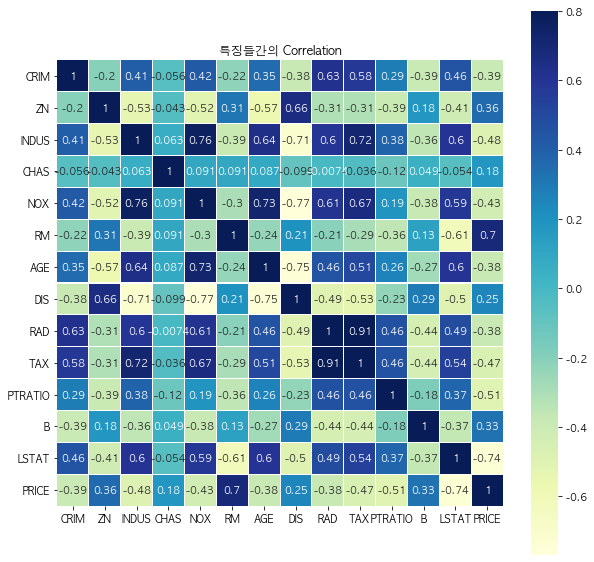

In [50]:
corr = boston_house_df.corr()
plt.figure(figsize=(10, 10));
sns.heatmap(corr,
            vmax=0.8,
            linewidths=0.01,
            square=True,
            annot=True,
            cmap='YlGnBu');
plt.title('특징들간의 Correlation');

### sns.regplot으로 scatter와 regression 라인 같이 출력해보기

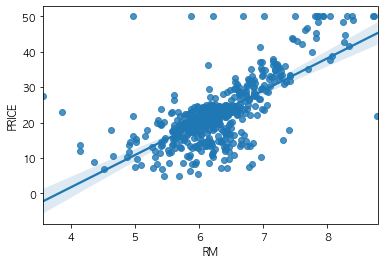

In [51]:
# 방의 갯수와 집값의 관계
sns.regplot(data=boston_house_df, x='RM', y='PRICE')
plt.show()

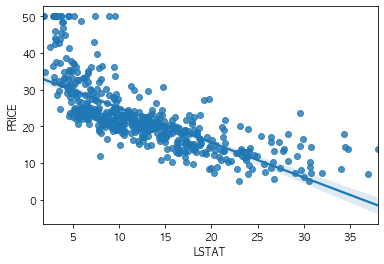

In [52]:
# 저소득층 비율과 집값의 관계
sns.regplot(data=boston_house_df, x='LSTAT', y='PRICE')
plt.show()

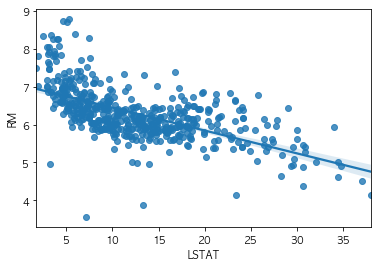

In [56]:
# 저소득층 비율과 방의 갯수의 관계
sns.regplot(data=boston_house_df, x='LSTAT', y='RM')
plt.show()

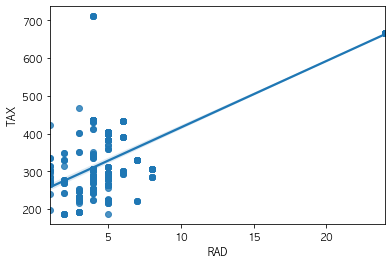

In [57]:
# 고속도로 접근 용의성과 세금과의 관계
sns.regplot(data=boston_house_df, x='RAD', y='TAX')
plt.show()

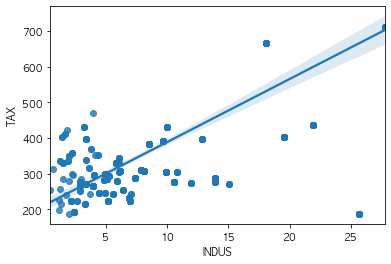

In [59]:
# 비상업지구와 세금과의 관계
sns.regplot(data=boston_house_df, x='INDUS', y='TAX')
plt.show()